In [1]:
# Perform the following operations using Python by creating a student performance dataset.
# 1.	Display Missing Values
# 2.	Replace missing values using replacement technique
# 3.	Identify the outlier
# 4.	Handle outlier using any two  technique
# 5.	Perform data normalization using Min Max


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data={
    'name':['A','B','C','D','E'],
    'maths':[85,90,np.nan,45,100],
    'science':[88,95,89,30,105],
    'english':[78,82,85,40,np.nan]
}

df=pd.DataFrame(data)
df

,name,maths,science,english
0,A,85.0,88,78.0
1,B,90.0,95,82.0
2,C,NaN,89,85.0
3,D,45.0,30,40.0
4,E,100.0,105,NaN


In [3]:
# 1.Display Missing Values
df.isnull().sum()

name       0
maths      1
science    0
english    1
dtype: int64

In [4]:
# 2.	Replace missing values using replacement technique
df['maths']=df['maths'].fillna(df['maths'].mean())
df['english']=df['english'].fillna(df['english'].mean())
df

,name,maths,science,english
0,A,85.0,88,78.00
1,B,90.0,95,82.00
2,C,80.0,89,85.00
3,D,45.0,30,40.00
4,E,100.0,105,71.25


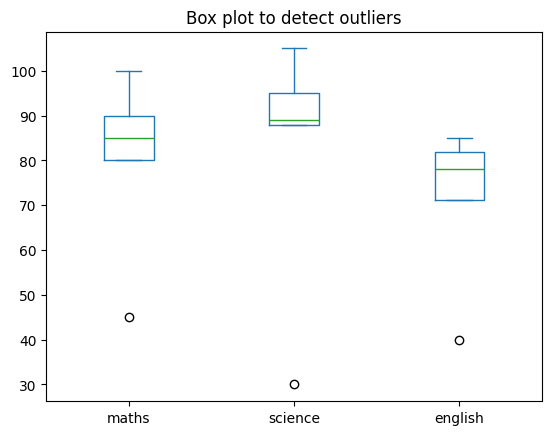

In [5]:
# 3.	Identify the outlier
df[['maths','science','english']].plot(kind='box')
plt.title('Box plot to detect outliers')
plt.show()

In [6]:
# 4.	Handle outlier using any two  technique
# Method 1 Clipping 
df['science']=df['science'].clip(lower=0,upper=100)
print("Min value in science:", df['science'].min())
print("Max value in science:", df['science'].max())

Min value in science: 30
Max value in science: 100


In [7]:
# 4.	Handle outlier using any two  technique
# Method 2 Z score method 
from scipy.stats import zscore
z_score=np.abs(zscore(df[['maths','english']]))
df=df[(z_score<3).all(axis=1)]
df

,name,maths,science,english
0,A,85.0,88,78.00
1,B,90.0,95,82.00
2,C,80.0,89,85.00
3,D,45.0,30,40.00
4,E,100.0,100,71.25


In [16]:
#5.	Perform data normalization using Min Max

df['maths_minmax'] = (df['maths'] - df['maths'].min()) / (df['maths'].max() - df['maths'].min())
df['science_minmax'] = (df['science'] - df['science'].min()) / (df['science'].max() - df['science'].min())
df['english_minmax'] = (df['english'] - df['english'].min()) / (df['english'].max() - df['english'].min())


In [17]:
df[['maths', 'science', 'english']] = (df[['maths', 'science', 'english']] - df[['maths', 'science', 'english']].min()) / (df[['maths', 'science', 'english']].max() - df[['maths', 'science', 'english']].min())
df

,name,maths,science,english,maths_minmax,science_minmax,english_minmax
0,A,0.727273,0.828571,0.844444,0.727273,0.828571,0.844444
1,B,0.818182,0.928571,0.933333,0.818182,0.928571,0.933333
2,C,0.636364,0.842857,1.000000,0.636364,0.842857,1.000000
3,D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,E,1.000000,1.000000,0.694444,1.000000,1.000000,0.694444
